# Iphone Purchase Prediction

* Importing the Libraries 

In [87]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold 
from sklearn.linear_model import LogisticRegression


* Importing the Dataset

In [61]:
df=pd.read_csv('https://raw.githubusercontent.com/omairaasim/machine_learning/master/project_11_k_nearest_neighbor/iphone_purchase_records.csv')

* Data Exploration

In [62]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [63]:
df.tail()

,Gender,Age,Salary,Purchase Iphone
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


* Getting the shape of the Df

In [64]:
df.shape

(400, 4)

* Getting basic Info

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


NO NaN values

* Getting the Statistical Information

In [66]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


* No.of Males & Females


In [67]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

* No.of Iphones purchased by each Gender

In [68]:
df.loc[df['Purchase Iphone']==1,'Gender'].value_counts()

Female    77
Male      66
Name: Gender, dtype: int64

* Encoding the Gender

In [69]:
newdf=df.copy()

In [70]:
le=LabelEncoder()

In [71]:
newdf.Gender=le.fit_transform(newdf.Gender)

In [72]:
newdf.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [73]:
newdf.Gender.value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [84]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int32
 1   Age              400 non-null    int64
 2   Salary           400 non-null    int64
 3   Purchase Iphone  400 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 11.1 KB


# Data Visualisation

* Getting the Correlation

In [74]:
newdf.corr()

,Gender,Age,Salary,Purchase Iphone
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
Salary,-0.060435,0.155238,1.000000,0.362083
Purchase Iphone,-0.042469,0.622454,0.362083,1.000000


* HeatMap

<AxesSubplot:>

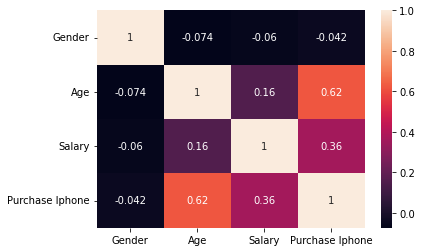

In [75]:
sns.heatmap(newdf.corr(), annot=True)

* Pairplot

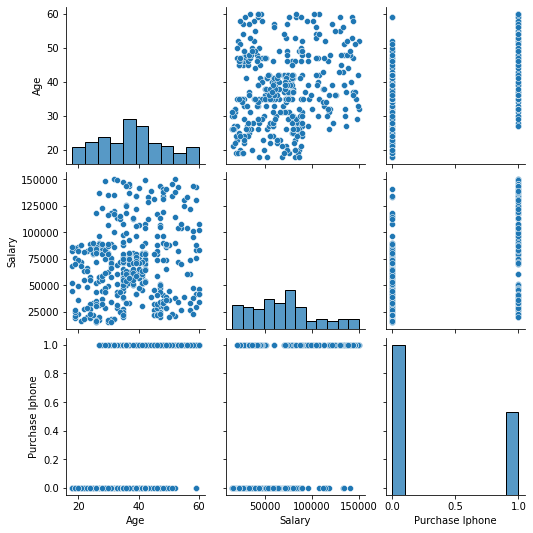

In [76]:
sns.pairplot(df)

* Plotting the Heatmap for the NaN values


<AxesSubplot:>

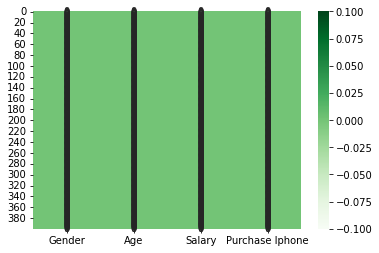

In [79]:
sns.heatmap(newdf.isna(),annot=True , cmap='Greens')

* Variablizing the Data


In [82]:
x=newdf.iloc[:,:-1]
y=newdf.iloc[:,-1]

* Splitting the Data

In [85]:
skf=StratifiedKFold(n_splits=5)

In [86]:
for train_index,test_index in skf.split(x,y):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]

* Model Selection

# KNN

In [88]:
knn=KNeighborsClassifier()

* Feature Scaling

In [89]:
scale=StandardScaler()

* Fitting the Data

In [91]:
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)